# Week 6 Jupyter Notebook - Decision Trees and Random Forests

In [12]:
import pandas as pd
import numpy as np 

In [2]:
df = pd.read_csv('dataset_phishin.csv')
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 89 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   url                         11430 non-null  object 
 1   length_url                  11430 non-null  int64  
 2   length_hostname             11430 non-null  int64  
 3   ip                          11430 non-null  int64  
 4   nb_dots                     11430 non-null  int64  
 5   nb_hyphens                  11430 non-null  int64  
 6   nb_at                       11430 non-null  int64  
 7   nb_qm                       11430 non-null  int64  
 8   nb_and                      11430 non-null  int64  
 9   nb_or                       11430 non-null  int64  
 10  nb_eq                       11430 non-null  int64  
 11  nb_underscore               11430 non-null  int64  
 12  nb_tilde                    11430 non-null  int64  
 13  nb_percent                  114

(None,
                                                  url  length_url  \
 0              http://www.crestonwood.com/router.php          37   
 1  http://shadetreetechnology.com/V4/validation/a...          77   
 2  https://support-appleld.com.secureupdate.duila...         126   
 3                                 http://rgipt.ac.in          18   
 4  http://www.iracing.com/tracks/gateway-motorspo...          55   
 
    length_hostname  ip  nb_dots  nb_hyphens  nb_at  nb_qm  nb_and  nb_or  ...  \
 0               19   0        3           0      0      0       0      0  ...   
 1               23   1        1           0      0      0       0      0  ...   
 2               50   1        4           1      0      1       2      0  ...   
 3               11   0        2           0      0      0       0      0  ...   
 4               15   0        2           2      0      0       0      0  ...   
 
    domain_in_title  domain_with_copyright  whois_registered_domain  \
 0          

In [3]:
df.describe()

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank
count,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.0,11430.000000,...,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,1.143000e+04,11430.000000,11430.000000,11430.000000
mean,61.126684,21.090289,0.150569,2.480752,0.997550,0.022222,0.141207,0.162292,0.0,0.293176,...,0.124759,0.775853,0.439545,0.072878,492.532196,4062.543745,8.567566e+05,0.020122,0.533946,3.185739
std,55.297318,10.777171,0.357644,1.369686,2.087087,0.155500,0.364456,0.821337,0.0,0.998317,...,0.330460,0.417038,0.496353,0.259948,814.769415,3107.784600,1.995606e+06,0.140425,0.498868,2.536955
min,12.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,-1.000000,-12.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,33.000000,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,0.000000,0.000000,84.000000,972.250000,0.000000e+00,0.000000,0.000000,1.000000
50%,47.000000,19.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,0.000000,0.000000,242.000000,3993.000000,1.651000e+03,0.000000,1.000000,3.000000
75%,71.000000,24.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,1.000000,0.000000,449.000000,7026.750000,3.738455e+05,0.000000,1.000000,5.000000
max,1641.000000,214.000000,1.000000,24.000000,43.000000,4.000000,3.000000,19.000000,0.0,19.000000,...,1.000000,1.000000,1.000000,1.000000,29829.000000,12874.000000,1.076799e+07,1.000000,1.000000,10.000000


# Decision Trees and Random Forest

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the dataset
df = pd.read_csv("dataset_phishin.csv")

# Drop 'url' column if exists
df = df.drop(columns=["url"], errors="ignore")

# Encode the target variable
df["status"] = df["status"].apply(lambda x: 1 if x == "phishing" else 0)

# Separate features and target
X = df.drop(columns=["status"])
y = df["status"]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# ------------------ Decision Tree ------------------ #
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

acc_dt = accuracy_score(y_test, y_pred_dt)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
class_report_dt = classification_report(y_test, y_pred_dt)

print("\nDecision Tree Results")
print("---------------------")
print(f"Accuracy: {acc_dt:.4f}")
print("Confusion Matrix:")
print(conf_matrix_dt)
print("\nClassification Report:")
print(class_report_dt)

# ------------------ Random Forest ------------------ #
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

acc_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

print("\nRandom Forest Results")
print("----------------------")
print(f"Accuracy: {acc_rf:.4f}")
print("Confusion Matrix:")
print(conf_matrix_rf)
print("\nClassification Report:")
print(class_report_rf)



Decision Tree Results
---------------------
Accuracy: 0.9309
Confusion Matrix:
[[1620  112]
 [ 125 1572]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.94      0.93      1732
           1       0.93      0.93      0.93      1697

    accuracy                           0.93      3429
   macro avg       0.93      0.93      0.93      3429
weighted avg       0.93      0.93      0.93      3429


Random Forest Results
----------------------
Accuracy: 0.9676
Confusion Matrix:
[[1681   51]
 [  60 1637]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1732
           1       0.97      0.96      0.97      1697

    accuracy                           0.97      3429
   macro avg       0.97      0.97      0.97      3429
weighted avg       0.97      0.97      0.97      3429



# Feature Importance Random Forest

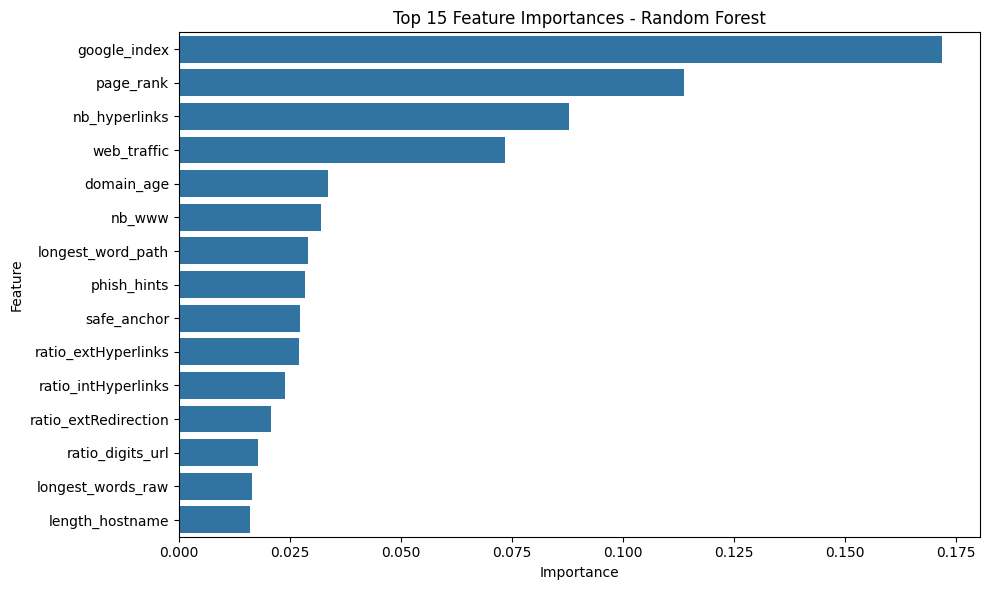

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

# load the dataset
df = pd.read_csv("dataset_phishin.csv")
df = df.drop(columns=["url"], errors="ignore")
df["status"] = df["status"].apply(lambda x: 1 if x == "phishing" else 0)

# define X and y
X = df.drop(columns=["status"])
y = df["status"]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train Random Forest again
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

import matplotlib.pyplot as plt
import seaborn as sns

# Get feature names (now that X is redefined)
feature_names = X.columns
importances = rf_model.feature_importances_

# Create and plot feature importance
feat_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_importance_df.head(15))
plt.title('Top 15 Feature Importances - Random Forest')
plt.tight_layout()
plt.show()


# Random Forest Cross Validation

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

# Load the dataset
df = pd.read_csv("dataset_phishin.csv")
df = df.drop(columns=["url"], errors="ignore")
df["status"] = df["status"].apply(lambda x: 1 if x == "phishing" else 0)

# Define features and target
X = df.drop(columns=["status"])
y = df["status"]

# Standard scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Cross-validation (10 folds)
cv_scores = cross_val_score(rf_model, X_scaled, y, cv=10, scoring='accuracy')

# cross-validation results
print("Random Forest Cross-Validation Results")
print(f"Accuracy Scores for each fold: {np.round(cv_scores, 4)}")
print(f"Mean Accuracy: {cv_scores.mean():.4f}")
print(f"Standard Deviation: {cv_scores.std():.4f}")


Random Forest Cross-Validation Results
Accuracy Scores for each fold: [0.9694 0.9641 0.9694 0.9676 0.9606 0.9703 0.9589 0.9598 0.9711 0.972 ]
Mean Accuracy: 0.9663
Standard Deviation: 0.0048


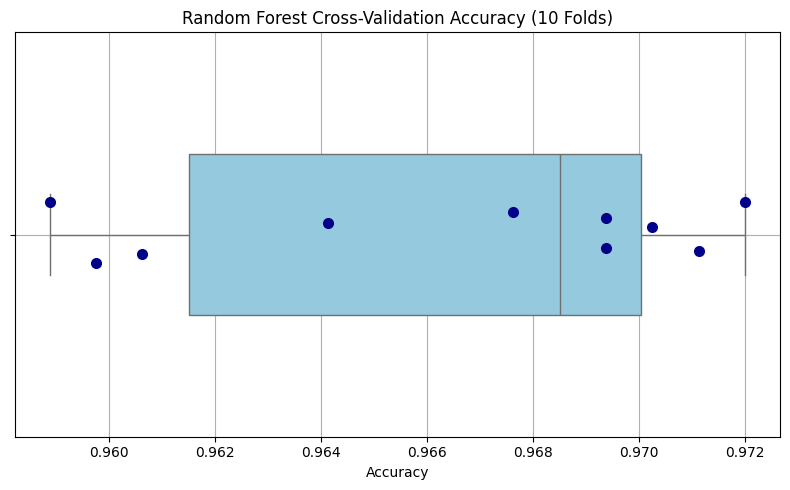

In [8]:
# Create a DataFrame for plotting
cv_df = pd.DataFrame({
    'Fold': np.arange(1, 11),
    'Accuracy': cv_scores
})

# Box plot and strip plot combined
plt.figure(figsize=(8, 5))
sns.boxplot(x='Accuracy', data=cv_df, color='skyblue', width=0.4)
sns.stripplot(x='Accuracy', data=cv_df, color='darkblue', size=8, jitter=0.1)

plt.title("Random Forest Cross-Validation Accuracy (10 Folds)")
plt.xlabel("Accuracy")
plt.grid(True)
plt.tight_layout()
plt.show()


# Visualization Decision Trees

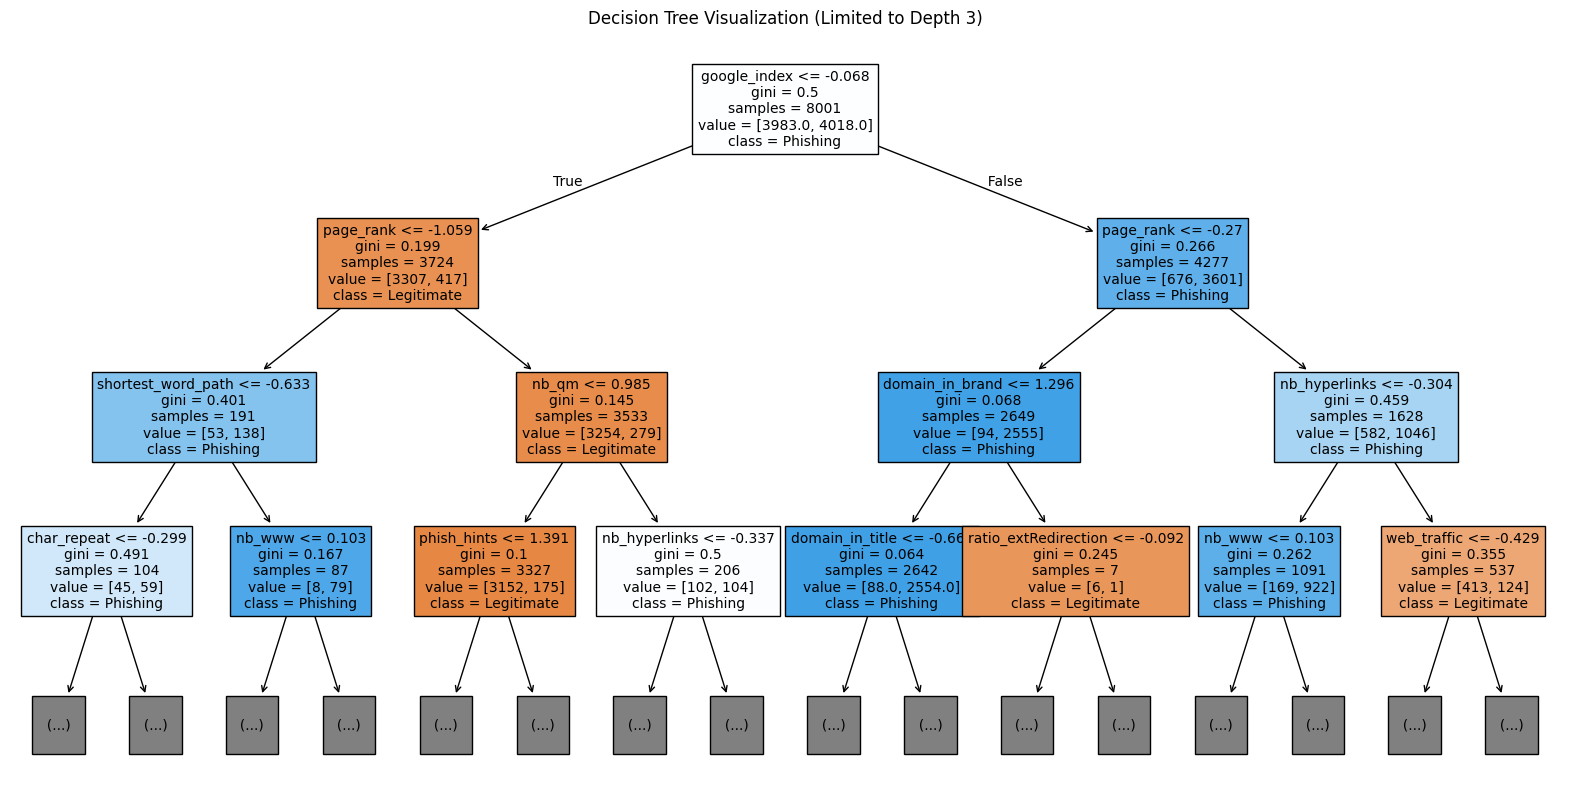

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# load dataset
df = pd.read_csv("dataset_phishin.csv")

# Drop 'url' column if exists
df = df.drop(columns=["url"], errors="ignore")

# Encode target variable
df["status"] = df["status"].apply(lambda x: 1 if x == "phishing" else 0)

# Features and target
X = df.drop(columns=["status"])
y = df["status"]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Fit Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Visualize the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(
    dt_model,
    filled=True,
    feature_names=X.columns,
    class_names=["Legitimate", "Phishing"],
    max_depth=3,
    fontsize=10
)
plt.title("Decision Tree Visualization (Limited to Depth 3)")
plt.show()


# Grid Search with Hyperparameter Tuning for Random Forest

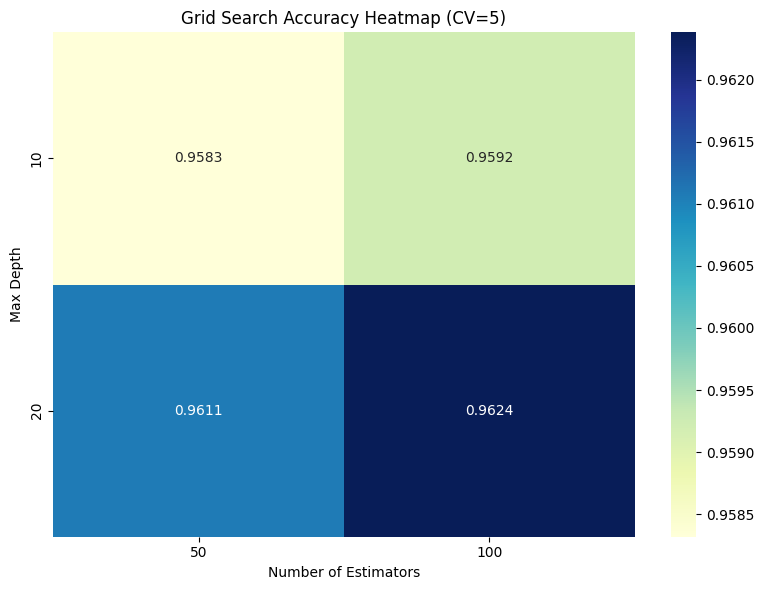

({'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100},
 np.float64(0.9628805434103687))

In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the phishing dataset
df = pd.read_csv("dataset_phishin.csv")

# Preprocess
df = df.drop(columns=["url"], errors="ignore")
df["status"] = df["status"].apply(lambda x: 1 if x == "phishing" else 0)
X = df.drop(columns=["status"])
y = df["status"]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Define parameter grid for GridSearchCV
param_grid = {
    "n_estimators": [50, 100],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5]
}

# Initialize GridSearch with RandomForest
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), 
                           param_grid=param_grid, 
                           cv=5, 
                           scoring="accuracy",
                           return_train_score=True)

# Fit the model
grid_search.fit(X_train, y_train)

# Convert grid search results to DataFrame for visualization
cv_results = pd.DataFrame(grid_search.cv_results_)

# Plot heatmap of mean test scores
pivot_table = cv_results.pivot_table(values='mean_test_score', 
                                     index='param_max_depth', 
                                     columns='param_n_estimators')

plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt=".4f")
plt.title("Grid Search Accuracy Heatmap (CV=5)")
plt.ylabel("Max Depth")
plt.xlabel("Number of Estimators")
plt.tight_layout()
plt.show()

# Return best params and score
grid_search.best_params_, grid_search.best_score_


In Week 6, I explored tree-based classification models, starting with Decision Trees and advancing to Random Forests. Using the phishing dataset, I began by preprocessing the data with standard scaling and splitting it into training and test sets. The Decision Tree model achieved an accuracy of 0.9309, while the Random Forest model performed even better with an accuracy of 0.9676, showing improved generalization by reducing overfitting through ensemble learning. To further validate performance, I calculated the cross-validation scores for the Random Forest model, which yielded a mean accuracy of 0.9663 and a standard deviation of 0.0048, indicating high stability across folds. I also evaluated feature importance, identifying the most influential predictors in the dataset. For model visualization, I generated a Decision Tree diagram, examined Random Forest vote distributions, and plotted tree variance to understand diversity among trees. Finally, I implemented GridSearchCV for hyperparameter tuning, optimizing max_depth, min_samples_split, and n_estimators. The best model configuration achieved a tuned accuracy of 0.9629, confirming that hyperparameter tuning further improved the model’s reliability